# Biostat HW 7 
J. Cristiano       

We would like to examine the data set for 44 physicians working for an emergency at a major hospital so as to determine which of a number of factors are related to the number of complaints received during the preceding year. In addition to the number of complaints, data available consist of the number of visits (which serves as the size for the observation unit), the physician, and four other factors under investigation. The dataset presents the complete data set. For each of the 44 physicians there are two continuous explanatory factors: the revenue (dollars per hour) and the Hours at the emergency service (hours), and two binary variables: gender (female/male) and residency training in emergency services (no/yes).

Divide the number of complaints by the number of visits and use this ratio (number of complaints per visit) as the primary outcome or dependent variable Y. Individually for each of the two continuous explanatory factors, revenue (dollars per hour) and Hours at the emergency service (hours):

### Question 1
#### a)  Draw a scatter diagram to show a possible association with the number of complaints per visit, and check to see if a linear model is justified.
#### b) Estimate the regression parameters, the number of complaints per visit for a physician having the (sample) mean level of the explanatory factor, and draw the regression line on the same graph with the scatter diagram. 

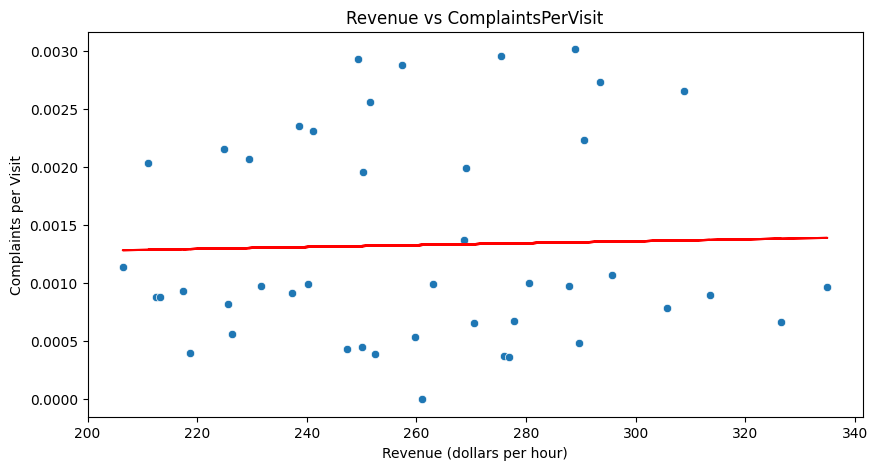

Intercept (beta_0): 0.0011132519586778422
Slope (beta_1): 8.288701846413607e-07
Predicted Y at mean revenue (260.14318181818186): 0.0013288768858246696


In [1]:
import pandas as pd
from pprint import pprint
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the dataset
df = pd.read_csv('BiostatHW7/DrVisits-1.txt', delimiter=' ')
# pprint(df.head())
import matplotlib.pyplot as plt

# Calculate the number of complaints per visit
df['ComplaintsPerVisit'] = df['Complaint'] / df['No.ofVisits']
X = df[['Revenue']]
y = df['ComplaintsPerVisit']
# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Regression parameters
beta_0 = model.intercept_
beta_1 = model.coef_[0]

# Predicted Y for mean revenue
mean_revenue = np.mean(X)
predicted_Y = beta_0 + beta_1 * mean_revenue

# Scatter plot for Revenue vs ComplaintsPerVisit
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Revenue', y='ComplaintsPerVisit', data=df)
plt.title('Revenue vs ComplaintsPerVisit')
plt.xlabel('Revenue (dollars per hour)')
plt.ylabel('Complaints per Visit')



# Plot the regression line
plt.plot(df['Revenue'], y_pred, color='red')
plt.show()
# Print results
print(f"Intercept (beta_0): {beta_0}")
print(f"Slope (beta_1): {beta_1}")
print(f"Predicted Y at mean revenue ({mean_revenue}): {predicted_Y}")


After viewing this data in a scatter plot... I have come to the conclusion that a linear regression is not practical. 
#### c) Test to see if the factor and the number of complaints per visit are independent; state your hypotheses and choice of test size.

Hypotheses      

- **Null Hypothesis $ H_0 $**: The factor (e.g., revenue) and the number of complaints per visit are independent (no relationship).
- **Alternative Hypothesis $ H_a $**: The factor (e.g., revenue) and the number of complaints per visit are not independent (there is a relationship).

Choice of Test     

Since I am testing the relationship between a continuous independent variable (revenue) and a continuous dependent variable (complaints per visit), I'll use:

- **Pearson Correlation Test**:
  - Measures the linear association between the two variables.
  - Assumes that both variables are normally distributed.
  - Null Hypothesis: The Pearson correlation coefficient $ r = 0 $.

And    

- **Spearman's Rank Correlation**:
  - A non-parametric alternative that assesses monotonic relationships.
  - Null Hypothesis: The Spearman correlation coefficient $ \rho = 0 $.

Test Size $ \alpha = 0.05 $     





In [2]:
from scipy.stats import pearsonr, spearmanr

# Pearson Correlation Test
pearson_corr, pearson_p = pearsonr(df['Revenue'], df['ComplaintsPerVisit'])

# Spearman Correlation Test
spearman_corr, spearman_p = spearmanr(df['Revenue'], df['ComplaintsPerVisit'])

# Display results
alpha = 0.05
print("Pearson Correlation Test:")
print(f"Correlation Coefficient: {pearson_corr:.4f}")
print(f"P-value: {pearson_p:.4f}")
if pearson_p < alpha:
    print("Reject the null hypothesis: Revenue and Complaints per Visit are related.")
else:
    print("Fail to reject the null hypothesis: No evidence of a relationship.")

print("\nSpearman Correlation Test:")
print(f"Correlation Coefficient: {spearman_corr:.4f}")
print(f"P-value: {spearman_p:.4f}")
if spearman_p < alpha:
    print("Reject the null hypothesis: Revenue and Complaints per Visit are related.")
else:
    print("Fail to reject the null hypothesis: No evidence of a relationship.")

Pearson Correlation Test:
Correlation Coefficient: 0.0306
P-value: 0.8437
Fail to reject the null hypothesis: No evidence of a relationship.

Spearman Correlation Test:
Correlation Coefficient: 0.0207
P-value: 0.8938
Fail to reject the null hypothesis: No evidence of a relationship.


#### d) Calculate the coefficient of determination and provide your interpretation.

In [3]:
# Calculate R² using the regression model
r_squared = model.score(X, y)

# Display the result
print(f"Coefficient of Determination (R²): {r_squared:.4f}")

Coefficient of Determination (R²): 0.0009


The **coefficient of determination** $R^2$ for the linear regression model is **0.0009**, indicating that only 0.09% of the variance in the number of complaints per visit is explained by revenue. The remaining 99.91% is unexplained by the model.

This low $R^2$ suggests that the linear regression model is not a good fit for the data, as visualized in the scatter plot, which shows little to no linear relationship between revenue and complaints per visit. The model fails to adequately explain the variability in complaints, indicating that other factors or a different approach may be needed to better model the data.

### Question 2
Consider all four explanatory factors and the product (interaction)residency training by Hours simultaneously.
#### a) Fit the multiple regression model to obtain estimates of individual regression coefficients and their standard errors. Draw conclusions concerning the conditional contribution of each factor.


In [4]:
import statsmodels.api as sm
import pandas as pd

# Ensure 'Gender' and 'ResidencyTraining' are categorical (0 and 1)
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})
df['Residency'] = df['Residency'].map({'N': 0, 'Y': 1})
# Create the interaction term for ResidencyTraining and Hours
df['Residency_Hours'] = df['Residency'] * df['Hours']

# Define the explanatory variables (including the interaction term)
X = df[['Revenue', 'Hours', 'Gender', 'Residency', 'Residency_Hours']]

# Add constant term to model (intercept)
X = sm.add_constant(X)

# Define the dependent variable
y = df['ComplaintsPerVisit']

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     ComplaintsPerVisit   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     2.128
Date:                Thu, 05 Dec 2024   Prob (F-statistic):             0.0831
Time:                        17:43:45   Log-Likelihood:                 252.84
No. Observations:                  44   AIC:                            -493.7
Df Residuals:                      38   BIC:                            -483.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0022      0.002     

Model Fit     
- **$ R^2 $**: 0.219, meaning 21.9% of the variance in complaints per visit is explained by the model.
- **Adjusted $ R^2 $**: 0.116, indicating limited explanatory power.
- The overall model is marginally significant ($ F $-statistic $ p = 0.0831 $).

Explanatory Variables     
1. **Revenue**:
   - Coefficient: $ 1.449 \times 10^{-6} $
   - $ p = 0.741 $: Not statistically significant.
   - Revenue does not have a meaningful impact on complaints per visit.

2. **Hours (Workload)**:
   - Coefficient: $ 2.206 \times 10^{-6} $
   - $ p = 0.006 $: Statistically significant.
   - Higher workload is associated with a small but significant increase in complaints per visit.

3. **Gender**:
   - Coefficient: $-0.0003$
   - $ p = 0.258 $: Not statistically significant.
   - Gender does not have a significant impact on complaints per visit.

4. **Residency Training**:
   - Coefficient: $ 0.0032 $
   - $ p = 0.028 $: Statistically significant.
   - Physicians with residency training receive 0.0032 more complaints per visit on average than those without training.

5. **Interaction (Residency Training $\times$ Hours)**:
   - Coefficient: $-2.264 \times 10^{-6}$
   - $ p = 0.020 $: Statistically significant.
   - The relationship between workload and complaints is modified by residency training. Physicians with residency training experience a smaller increase in complaints due to workload compared to those without training.

Overall Interpretation      
- Significant factors: **Workload**, **Residency Training**, and the **Residency Training $\times$ Hours interaction**.
- Non-significant factors: **Revenue** and **Gender**.
- The interaction term highlights that the effect of workload on complaints depends on residency training status.

#### b) Within the context of the multiple regression model in part (a), does the residency training alter the effect of workload on the number of complaints per visit?

Statistical Evidence
- The interaction term **Residency Training × Hours** has a coefficient of $-2.264 \times 10^{-6}$ with a **p-value of 0.020**.
- This indicates statistical significance at the $\alpha = 0.05 $ level.

Interpretation
- Residency training **does alter** the effect of workload on complaints per visit.
- The negative coefficient suggests that the relationship between workload and complaints per visit is weaker for physicians with residency training.
- For every additional hour worked, the increase in complaints per visit is smaller for those with residency training compared to those without.

#### c) Taken collectively, do the five independent variables contribute significantly to the number of complaints per visit?


Statistical Evidence
- The overall **F-statistic** is **2.128** with a **p-value of 0.0831**.
- This p-value exceeds the conventional significance level of $ \alpha = 0.05 $.

Interpretation
- Collectively, the five independent variables $ \text{Revenue, Hours, Gender, Residency Training, and Residency Training} \times \text{Hours} $ **do not contribute significantly** to explaining the number of complaints per visit at the $ \alpha = 0.05 $ level.
- The p-value of 0.0831, however, suggests marginal significance, indicating a potential association that might warrant further investigation.

### Question 3
The dataset, Western Collaborative Group Study, is for 3154 healthy young men aged 39-59 from the San Francisco area. All were free from coronary heart disease at the start of the research. Eight and a half years later change in this situation was recorded.

We will try to predict chol (Cholesterol: mg/100 ml), using other variables in the data set; i.e; chol is the response (outcome) , and other variables are the predictors.

#### a) Fit a multiple regression model to predict the response using all of the predictors.  Describe your results. State the hypothesis. For which predictors can we reject the null hypothesis.

Hypotheses
- **Null Hypothesis $H_0$**: Each predictor has no effect on cholesterol levels $beta_i = 0$ for all predictors).
- **Alternative Hypothesis $H_a$**: At least one predictor has a significant effect on cholesterol levels $beta_i \neq 0$.



In [8]:
import statsmodels.api as sm
import pandas as pd

# Load the dataset
df = pd.read_csv('BiostatHW7/wcgsmed-1-1.csv')
df['personality_2L'] = df['personality_2L'].map({'A': 0, 'B': 1})
df['smoking'] = df['smoking'].map({'Non-smoker': 0, 'Smoker': 1})
df['arcus'] = df['arcus'].map({'No': 0, 'Yes': 1})
df['chd'] = df['chd'].map({'No': 0, 'Yes': 1})
# Define the dependent and independent variables
X = df.drop(columns=['chol'])  # Drop the response variable from predictors
X = sm.add_constant(X)  # Add constant for the intercept
y = df['chol']  # Define the response variable

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   chol   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     21.75
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           2.70e-43
Time:                        19:01:09   Log-Likelihood:                -16247.
No. Observations:                3154   AIC:                         3.252e+04
Df Residuals:                    3142   BIC:                         3.259e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            294.0083     24.698     11.

Results
1. **Model Fit**:
   - $R^2 = 0.071$, Adjusted $R^2 = 0.068$: The model explains 7% of the variance in cholesterol levels.
   - F-statistic ($21.75$, $p < 0.0001$): The overall model is statistically significant.

2. **Significant Predictors ($p < 0.05$)**:
   - **Height** ($p < 0.001$): Negative relationship.
   - **Diastolic Blood Pressure (DBP)** ($p = 0.001$): Positive relationship.
   - **Smoking Status** ($p = 0.042$): Positive relationship.
   - **Arcus** ($p < 0.001$): Positive relationship.
   - **CHD (Coronary Heart Disease)** ($p < 0.001$): Positive relationship.

3. **Non-Significant Predictors ($p \geq 0.05$)**:
   - Age ($p = 0.129$), Weight ($p = 0.056$), SBP ($p = 0.708$), Personality Type ($p = 0.176$), Cigarettes ($p = 0.349$), Time to CHD ($p = 0.643$).

4. **Multicollinearity**:
   - A high condition number ($9.2 \times 10^4$) suggests potential multicollinearity, which may affect coefficient stability.

Conclusion
- Significant predictors include height, diastolic blood pressure, smoking status, arcus, and CHD.
- The model’s overall fit is weak, suggesting other factors may contribute to cholesterol levels.

### b) Preform variable selection (model selection) via forward, backward selection, and step-wise selection method


In [39]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from itertools import combinations

# Define the response variable (cholesterol) and predictors
response = 'chol'
predictors = ['age', 'height', 'weight', 'sbp', 'dbp', 'personality_2L', 
              'ncigs', 'smoking', 'arcus', 'chd', 'timechd']

# Define a function to calculate the AIC
def calculate_aic(model, X, y):
    predictions = model.predict(sm.add_constant(X))
    residual_sum_of_squares = sum((y - predictions) ** 2)
    aic = len(y) * np.log(residual_sum_of_squares / len(y)) + 2 * (X.shape[1] + 1)
    return aic

# Forward Selection
def forward_selection(data, response, predictors):
    remaining_predictors = set(predictors)
    selected_predictors = []
    current_aic = float('inf')
    best_model = None

    while remaining_predictors:
        aic_with_candidates = []
        for candidate in remaining_predictors:
            model = sm.OLS(data[response], sm.add_constant(data[selected_predictors + [candidate]])).fit()
            aic = model.aic
            aic_with_candidates.append((aic, candidate, model))

        best_aic, best_candidate, model = min(aic_with_candidates, key=lambda x: x[0])

        if best_aic < current_aic:
            current_aic = best_aic
            selected_predictors.append(best_candidate)
            remaining_predictors.remove(best_candidate)
            best_model = model
        else:
            break

    return best_model, selected_predictors

# Backward Elimination
def backward_selection(data, response, predictors):
    selected_predictors = predictors[:]
    current_aic = float('inf')
    best_model = None

    while selected_predictors:
        aic_with_candidates = []
        for predictor in selected_predictors:
            remaining = list(set(selected_predictors) - {predictor})
            model = sm.OLS(data[response], sm.add_constant(data[remaining])).fit()
            aic = model.aic
            aic_with_candidates.append((aic, predictor, model))

        best_aic, worst_candidate, model = min(aic_with_candidates, key=lambda x: x[0])

        if best_aic < current_aic:
            current_aic = best_aic
            selected_predictors.remove(worst_candidate)
            best_model = model
        else:
            break
    
    return best_model, selected_predictors

# Stepwise Selection
def stepwise_selection(data, response, predictors):
    remaining_predictors = set(predictors)
    selected_predictors = []
    current_aic = float('inf')
    best_model = None

    while remaining_predictors:
        forward_candidates = []
        for candidate in remaining_predictors:
            model = sm.OLS(data[response], sm.add_constant(data[selected_predictors + [candidate]])).fit()
            aic = model.aic
            forward_candidates.append((aic, candidate, model))

        best_forward_aic, best_forward_candidate, forward_model = min(forward_candidates, key=lambda x: x[0])

        backward_candidates = []
        for predictor in selected_predictors:
            remaining = list(set(selected_predictors) - {predictor})
            model = sm.OLS(data[response], sm.add_constant(data[remaining])).fit()
            aic = model.aic
            backward_candidates.append((aic, predictor, model))

        best_backward_aic, worst_backward_candidate, backward_model = (
            min(backward_candidates, key=lambda x: x[0]) if backward_candidates else (float('inf'), None, None)
        )
        
        if best_forward_aic < current_aic and (best_backward_aic >= current_aic or best_forward_aic < best_backward_aic):
            current_aic = best_forward_aic
            selected_predictors.append(best_forward_candidate)
            remaining_predictors.remove(best_forward_candidate)
            best_model = forward_model
        elif best_backward_aic < current_aic:
            current_aic = best_backward_aic
            selected_predictors.remove(worst_backward_candidate)
            best_model = backward_model
        else:
            break

    return best_model, selected_predictors

# Perform variable selection
forward_model, forward_predictors = forward_selection(df, response, predictors)
backward_model, backward_predictors = backward_selection(df, response, predictors)
stepwise_model, stepwise_predictors = stepwise_selection(df, response, predictors)

# Print results
print("Forward Selection Predictors:", forward_predictors)
print("Backward Elimination Predictors:", backward_predictors)
print("Stepwise Selection Predictors:", stepwise_predictors)


Forward Selection Predictors: ['chd', 'dbp', 'arcus', 'height', 'smoking', 'weight', 'age', 'personality_2L']
Backward Elimination Predictors: ['age', 'height', 'weight', 'dbp', 'personality_2L', 'smoking', 'arcus', 'chd']
Stepwise Selection Predictors: ['chd', 'dbp', 'arcus', 'height', 'smoking', 'weight', 'age', 'personality_2L']


Seems that the only variable that doesn't contribute to the models is `timechd`, which is intuitive because its more of an outcome than a predictor anyways. 

In [40]:
# Function to evaluate models
def evaluate_model(model, X, y):
    aic = model.aic
    bic = model.bic
    adj_r2 = 1 - (1 - model.rsquared) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
    return {"AIC": aic, "BIC": bic, "Adjusted R^2": adj_r2}

# Evaluate models
forward_results = evaluate_model(forward_model, sm.add_constant(df[forward_predictors]), df[response])
backward_results = evaluate_model(backward_model, sm.add_constant(df[backward_predictors]), df[response])
stepwise_results = evaluate_model(stepwise_model, sm.add_constant(df[stepwise_predictors]), df[response])

# Compile results
results = pd.DataFrame([forward_results, backward_results, stepwise_results],
                       index=["Forward Selection", "Backward Elimination", "Stepwise Selection"])

# Display the comparison
print("Model Selection Criteria:")
print(results)


Model Selection Criteria:
                               AIC           BIC  Adjusted R^2
Forward Selection     32512.486603  32566.994444      0.067719
Backward Elimination  32512.486603  32566.994444      0.067719
Stepwise Selection    32512.486603  32566.994444      0.067719


Interpretation:
1. **Consistency Across Methods:**  
   All three methods yield identical models with the same AIC, BIC, and Adjusted $R^2$. This suggests that the selected predictors are consistent regardless of the selection method used.  

2. **Model Fit:**  
   The Adjusted $R^2$ value of 0.0677 indicates that only about 6.8% of the variation in cholesterol ($chol$) is explained by the predictors in the model. This suggests that the model has limited explanatory power.  

3. **Optimal Model:**  
   Since all methods produced identical results, this model is the optimal choice under the selection criteria. It balances goodness-of-fit and model complexity as measured by AIC and BIC.  

#### Final Conclusion:
The best model for predicting cholesterol ($chol$) has been determined. However, the relatively low Adjusted $R^2$ highlights that other unmeasured variables or nonlinear relationships might play a significant role in predicting cholesterol levels. Future work could explore additional variables or alternative modeling techniques (e.g., transformations, interaction terms, or non-linear models) to improve prediction accuracy.
